In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

__PATH__ = Path().parent
__DATA__ = __PATH__ / 'db'

def load_data(ref:str='hasil hasil belajar', type:str='xlsx', sheet:int=2) -> pd.DataFrame :
    """
    
    Fungsi ini mengembalikan data yang dibutuhkan untuk tugas Fuzzy Logic (Rules)
    ref : str 
        Nama file yang akan di load | default : 'hasil hasil belajar.xlsx'
    type : str {'xlsx','csv'}
        Tipe file yang akan di load | default : 'xlsx'
    sheet : int
        Sheet yang akan di load | default : 2
    
    Output : pd.DataFrame
    
    """
    try : 
        if type == 'xlsx' : 
            output = pd.read_excel(__DATA__ / f'{ref}.xlsx', sheet_name=sheet)
        elif type == 'csv' : 
            output = pd.read_csv(__DATA__ / f'{ref}.csv', sheet_name=sheet)
        else : 
            raise ValueError(f'Tipe file {type} tidak dikenal')
    except : 
        raise FileNotFoundError(f'File {ref} tidak ditemukan')
        # print(f'File {ref} tidak ditemukan')
    
    return output
    


In [2]:
df = load_data()
df.head()

,Unnamed: 0,rata2 Lama akses materi,"lama_berlatih (min 5, mak 15)",nilai,lulus,kepercayaan
0,NaN,kecil,kecil,kecil,tidak lulus,100
1,NaN,kecil,kecil,sedang,tidak lulus,100
2,NaN,kecil,kecil,besar,tidak lulus,95
3,NaN,kecil,sedang,kecil,tidak lulus,100
4,NaN,kecil,sedang,sedang,tidak lulus,95


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,rata2 Lama akses materi,"lama_berlatih (min 5, mak 15)",nilai,lulus,kepercayaan
0,kecil,kecil,kecil,tidak lulus,100
1,kecil,kecil,sedang,tidak lulus,100
2,kecil,kecil,besar,tidak lulus,95
3,kecil,sedang,kecil,tidak lulus,100
4,kecil,sedang,sedang,tidak lulus,95


In [32]:
#jika df.lulus = tidak lulus maka df.kepercayaan = 100 - x
for iter1, row in df.iterrows() : 
    if row['lulus'] == 'tidak lulus' : 
        df.loc[iter1, 'kepercayaan'] = 100 - row['kepercayaan']
        df.loc[iter1, 'lulus'] = 'lulus'

In [6]:
#ubah dari angka menjadi kecil, sedang, besar
for iter1, row in df.iterrows() : 
    if row['kepercayaan'] < 25 : 
        df.loc[iter1, 'kepercayaan'] = 'kecil'
    elif row['kepercayaan'] < 75 : 
        df.loc[iter1, 'kepercayaan'] = 'sedang'
    else : 
        df.loc[iter1, 'kepercayaan'] = 'besar'

C:\Users\Windows\AppData\Local\Temp\ipykernel_59244\960767178.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'kecil' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[iter1, 'kepercayaan'] = 'kecil'


In [33]:
df

,rata2 Lama akses materi,"lama_berlatih (min 5, mak 15)",nilai,lulus,kepercayaan
0,kecil,kecil,kecil,lulus,kecil
1,kecil,kecil,sedang,lulus,kecil
2,kecil,kecil,besar,lulus,kecil
3,kecil,sedang,kecil,lulus,kecil
4,kecil,sedang,sedang,lulus,kecil
5,kecil,sedang,besar,lulus,kecil
6,kecil,besar,kecil,lulus,kecil
7,kecil,besar,sedang,lulus,kecil
8,kecil,besar,besar,lulus,besar
9,sedang,kecil,kecil,lulus,kecil


In [8]:
df.columns
df.duplicated().sum()

np.int64(0)

In [9]:
#Check duplikat
df_no_kepercayaan = df.drop(columns=['kepercayaan'])
df_no_kepercayaan.duplicated().sum()
print(len(df))

27


In [10]:
for key,value in df.iterrows():
    print(key,value)

0 rata2 Lama akses materi          kecil
lama_berlatih (min 5, mak 15)    kecil
nilai                            kecil
lulus                            lulus
kepercayaan                      kecil
Name: 0, dtype: object
1 rata2 Lama akses materi           kecil
lama_berlatih (min 5, mak 15)     kecil
nilai                            sedang
lulus                             lulus
kepercayaan                       kecil
Name: 1, dtype: object
2 rata2 Lama akses materi          kecil
lama_berlatih (min 5, mak 15)    kecil
nilai                            besar
lulus                            lulus
kepercayaan                      kecil
Name: 2, dtype: object
3 rata2 Lama akses materi           kecil
lama_berlatih (min 5, mak 15)    sedang
nilai                             kecil
lulus                             lulus
kepercayaan                       kecil
Name: 3, dtype: object
4 rata2 Lama akses materi           kecil
lama_berlatih (min 5, mak 15)    sedang
nilai                       

In [11]:
def triangular_fuzzy(max:float, min:float, mid:float, x:float) -> float:
    """
    Fungsi ini mengembalikan nilai fuzzy dari suatu nilai x
    max : float
        Batas atas
    min : float
        Batas bawah
    mid : float
        Nilai tengah
    x : float
        Nilai x yang akan dihitung
        
    Output : float
    """
    if x <= min : 
        return 0
    elif x <= mid : 
        return (x - min) / (mid - min)
    elif x <= max : 
        return (max - x) / (max - mid)
    else : 
        return 0


def trapezoidal_fuzzy(max:float, min:float, mid1:float, mid2:float, x:float, type:str) -> float:
    """
    Fungsi ini mengembalikan nilai fuzzy dari suatu nilai x
    max : float
        Batas atas
    min : float
        Batas bawah
    mid1 : float
        Nilai tengah 1
    mid2 : float
        Nilai tengah 2
    x : float
        Nilai x yang akan dihitung
    type : str {'left','right'}
        Tipe trapesium yang akan dihitung
        
    Output : float
    """
    if type == 'left' : 
        if x <= min : 
            return 1
        elif x <= mid1 : 
            return (x - min) / (mid1 - min)
        elif x <= mid2 : 
            return 1
        elif x <= max : 
            return (max - x) / (max - mid2)
        else : 
            return 0
    elif type == 'right' : 
        if x <= min : 
            return 0
        elif x <= mid1 : 
            return (x - min) / (mid1 - min)
        elif x <= mid2 : 
            return 1
        elif x <= max : 
            return (max - x) / (max - mid2)
        else : 
            return 1
    else : 
        return 0


In [12]:
df.columns.to_list()

['rata2 Lama akses materi',
 'lama_berlatih (min 5, mak 15)',
 'nilai',
 'lulus',
 'kepercayaan']

In [ ]:
class DataFuzzy:
    def __init__(self, df_name, domain_width) -> None:
        df_name = df_name or "hasil hasil belajar"
        df1 = load_data(df_name, sheet=0)
        df2 = load_data(df_name, sheet=1)
        # df1['kesimpulannya'] = df1['kesimpulannya'].apply(lambda x: 0)
        # df1['keyakinan'] = df1['keyakinan'].apply(lambda x: 100-x)
        self.df = pd.concat([df1,df2], ignore_index=True)
        self.df['nilai'] = self.df['nilai'].apply(lambda x: int(x))
        self.findAll()
        self.columns = self.df.columns.to_list()
        # self.makeFuzzyDomain()
        self.changeMenitToDetik_Column(['lama_berlatih (min 5, mak 15)'])
        self.rules = df
        self.domain_width = domain_width
        self.InferenceResult = None
        self.Process()
        
        
    def findMax(self, column:str) -> float:
        return self.df[column].max()
    
    def findMin(self, column:str) -> float:
        return self.df[column].min()
    
    def findAll(self):
        self.findAllMax()
        self.findAllMin()
    
    def findAllMax(self) -> dict:
        self.AllMax = {col:self.findMax(col) for col in self.df.columns}

    def findAllMin(self) -> dict:
        self.AllMin = {col:self.findMin(col) for col in self.df.columns}
    
    def deleteColumns(self, columns:list) -> None:
        self.df.drop(columns=columns, inplace=True)
        
    @staticmethod
    def __menittoDetikconverter(x:str='7 menit, 32 detik') -> int:
        """
        Fungsi ini mengembalikan nilai detik dari suatu string waktu
        x : str
            String waktu dalam format 'menit menit, detik det
        Output : int
        """
        menit, detik = x.split(',')
        menit = int(menit.split(' ')[0])
        detik = int(detik.split(' ')[1])
        return menit*60+detik
    
    def changeMenitToDetik_Column(self, columns:list) -> None:
        for col in columns:
            self.df[col] = self.df[col].apply(lambda x: self.__menittoDetikconverter(x))
        self.findAll()
            
    @staticmethod
    def make_domain(min:int,max:int,amount:int,domain_width:float=0.05) -> list:
        """
        Fungsi make_domain digunakan untuk membuat domain fuzzy
        
        min : nilai minimum dari domain fuzzy
        max : nilai maksimum dari domain fuzzy
        amount: jumlah domain fuzzy yang akan dibuat
        domain_width : pergeseran domain fuzzy (default : 0.05)
        shifting yang digunakan yaitu (max-min)*domain_width
        
        """
        
        domain = [(i-int((max-min)*domain_width), i-1+(max-min)//amount+int((max-min)*domain_width)) for i in range(min,max+(max%amount)+1,int((max-min)/amount))]
        # print(domain)
        if len(domain) > amount or domain[-1][1] > max:
            domain.pop()
            domain[-1] = (domain[-1][0],int(max+(max-min)*domain_width))
        
        if len(domain) != amount:
            raise ValueError("Kesalahan dalam pembuatan domain fuzzy. Nilai yang digunakan tidak dapat dibagi rata dengan jumlah domain yang ingin dibuat")
        
        domain[1] = (min + int((max-min)*domain_width), max - int((max-min)*domain_width))
        return domain            
            
    def makeFuzzyDomain(self, exception:list=[], domain_width:float=0.05) -> None:
        self.data_fuzzy = {}
        for value in self.columns:
            if(value not in exception):
                try:
                    # if(value == 'lama_berlatih (min 5, mak 15)'):
                    #     self.data_fuzzy[value] = (self.make_domain(5*60,15*60,3))
                    # else:
                    ans = (self.make_domain(min=int(self.AllMin[value]),max=int(self.AllMax[value]),amount=3,domain_width=domain_width))
                    self.data_fuzzy[value] = ans
                    # print(ans)
                except ValueError as e:
                    # print(e)
                    self.data_fuzzy[value] = None
                
        # self.showFigure()
                
    @staticmethod
    def checkRange(data:dict, title:str, value:int) -> list[int]:
        """
        Fungsi ini mengembalikan index rentang fuzzy dari suatu nilai
        data : dict
            Data fuzzy yang akan di cek
        title : str
            Judul data yang akan di cek
        value : int
            Nilai yang akan di cek
            
        Minus : Belum bisa mencari jika dia berada di 2 rentang bersamaan
            
        Output : list[int]
        """
        ans = []
        # print(data[title][0])
        for idx, (min,max) in enumerate(data[title]):
            if (idx == 0) and (value <= min):
                ans.append(idx)
            elif (idx == len(data[title])-1) and (value >= max):
                ans.append(idx)
            elif value >= min and value <= max:
                ans.append(idx)
        return ans


    def showFigure(self) -> None:
        if self.data_fuzzy is None:
            raise ValueError("Data Fuzzy belum dibuat")
        
        if self.AllMax is None or self.AllMin is None:
            raise ValueError("Data Max atau Min belum dibuat")
        
        fig, ax = plt.subplots(1,len(self.data_fuzzy),figsize=(10,2))  
        for key,data in enumerate(self.data_fuzzy):
            for idx, (min,max) in enumerate(self.data_fuzzy[data]):
                # print(min,max)
                if idx == 0:
                    ax[key].plot([min, (max+min)/2, max], [1, 1, 0])
                elif idx == len(self.data_fuzzy[data])-1:
                    ax[key].plot([min, (max+min)/2, max], [0, 1, 1])
                else:
                    ax[key].plot([min, (max+min)/2, max], [0, 1, 0])
                
                ax[key].set_title(f'{data}', fontsize=6)
                # ax[key].set_xlabel('Nilai', fontsize=6)
                ax[key].set_ylabel('Fuzzy Value', fontsize=6)
                
    @staticmethod
    def flatten_list(list_flatten:list) -> list:
        """
        Fungsi flatten_list digunakan untuk meratakan list
        
        list_flatten : list yang akan diratakan
        
        """
        return [item for sublist in list_flatten for item in sublist]

    def Fuzzifikasi(self, exceptions:list[str]) -> dict:
        """"
        
        Fungsi ini digunakan untuk menghitung nilai fuzzy dari suatu data dan mendapatkan derajat keanggotaannya
        
        
        """
        if self.df is None:
            raise ValueError("Data belum di load")
        
        if self.data_fuzzy is None:
            raise ValueError("Data Fuzzy belum dibuat")
        
        self.hasilFuzzy = None
        all_result = []
        
        #Cari alphapredikat
        # for key,value in self.df.iterrows():
        #     all_alphapredikat = {}
        #     for idx, data in value.items():
        #         if (idx not in exceptions):
        #             ans = []
        #             selected = self.checkRange(self.data_fuzzy, idx, data)
        #             # print(selected)
        #             for num in selected:
        #                 # print(self.data_fuzzy[idx][0][num][1])
        #                 maks = self.data_fuzzy[idx][num][1]
        #                 minn = self.data_fuzzy[idx][num][0]
        #                 if num == 0:
        
        
        for key,value in self.df.iterrows():
            result = {}
            for idx, data in value.items():
                if (idx not in exceptions):
                    ans = []
                    selected = self.checkRange(self.data_fuzzy, idx, data)
                    # print(selected)
                    for num in selected:
                        # print(self.data_fuzzy[idx][0][num][1])
                        maks = self.data_fuzzy[idx][num][1]
                        minn = self.data_fuzzy[idx][num][0]
                        if num == 0: #kalo di anggota kiri (trapezoidal kiri)
                            ans.append(trapezoidal_fuzzy(min=minn, mid1=minn, mid2=(maks+minn)/2, max=maks, x=data, type='left'))
                        elif num == len(self.data_fuzzy[idx])-1: #kalo di anggota tengah (segitiga)
                            ans.append(trapezoidal_fuzzy(min=minn, mid1=(maks+minn)/2, mid2=maks, max=maks, x=data, type='right'))
                        else: #kalo di anggota kanan (trapezoidal kanan)
                            ans.append(triangular_fuzzy(min=minn, mid=(maks+minn)/2, max=maks, x=data))
                    result[idx] = selected, ans
                
            all_result.append(result)
            
        self.hasilFuzzy = all_result
        # print(len(self.hasilFuzzy))
        return all_result

    def showFuzzyResult(self, idx:int) -> None:
        """
        
        Fungsi ini digunakan untuk menampilkan hasil fuzzy dari suatu data
        idx : int
            Index data yang ingin ditampilkan
        
        """
        if self.hasilFuzzy is None:
            raise ValueError("Data Fuzzy belum dihitung")
        if idx >= len(self.hasilFuzzy):
            raise ValueError("Index yang diinput melebihi jumlah data")
        
        for key,value in self.hasilFuzzy[idx].items():
            print(key,value)
            
    @staticmethod
    def findCombination(data:list) -> list:
        """
        Fungsi ini mengembalikan semua kombinasi dari suatu list untuk fuzzy
        data : list
            List yang isinya list dari data yang ingin dicari
            
        Output : list
        """
        
        all_count = [0 for _ in range(len(data))]
        prob = 1
        for i in all_count:
            prob *= len(data[i])
        all_comb = []
        for _ in range(prob):
            # print(all_count)
            temp = []
            try :
                for idx,value in enumerate(all_count):
                    temp.append(data[idx][value])
                if temp not in all_comb:
                    all_comb.append(temp)
                    
                all_count[-1] += 1
                for i in range(len(all_count)-1,-1,-1):
                    if all_count[i] == len(data[i]):
                        all_count[i] = 0
                        all_count[i-1] += 1
            except:
                break                
        return all_comb
   
   
    @staticmethod
    def applyRules(data:list, rules:pd.DataFrame, value:float) -> list:
        """
        
        Fungsi ini digunakan untuk mencocokkan rules pada data fuzzy (satu data)
        data : list
            List data fuzzy yang akan di cek
        rules : pd.DataFrame
            Data rules yang akan di cek
        value : float
            Derajat keanggotaan dari data fuzzy
        
        """
        for key,rule in rules.iterrows():
            if(data == [rule[0], rule[1], rule[2]]): 
                return [(rule.iloc[-2], rule.iloc[-1])]
                
   
    def Inference(self) -> None:
        """
        
        Fungsi ini digunakan untuk memproses data fuzzy yang sudah dihitung, dan mencari hasil inferensi
        
        """
        if self.hasilFuzzy is None:
            raise ValueError("Data Fuzzy belum dihitung")
        
        #Mencari alpha predikat dari tiap data
        all_alphapredikat = []
        for value in self.hasilFuzzy:
            result = []
            for idx, data in value.items():
                result.append(data[0])
                
            ans = self.findCombination((result))
            all_combi = []
            for search in ans:
                smallestValue = value[list(value.keys())[0]][1][value[list(value.keys())[0]][0].index(search[0])]
                for key,(idx, data) in enumerate(value.items()):
                    try:
                        smallestValue = min(smallestValue, data[1][data[0].index(search[key])])
                    except:
                        pass
                    # print(data[1][search[idx]])
                all_combi.append((search, smallestValue))
            
            all_alphapredikat.append(all_combi)
            
        mapping = {
            0 : 'kecil',
            1 : 'sedang',
            2 : 'besar'
        }
        
        self.alphapredikat = all_alphapredikat
        
        inferenced_result = [] 
        #cari agregasi rendah, sedang, besar dari semua data
        for data in all_alphapredikat:
            best = {
                'kecil' : 0,
                'sedang' : 0,
                'besar' : 0
            }
            for combination,value in data:
                mapped_value = [mapping[value] for value in combination]
                result = self.applyRules(mapped_value, self.rules, value)
                for idx in range(len(result)):
                    best[result[idx][1]] = max(best[result[idx][1]], value)
            inferenced_result.append(best)
        self.InferenceResult = inferenced_result
        
        #apply rules
        # inferenced_result = []
        # # print(all_result[0])
        # for data in all_alphapredikat:
        #     best = {
        #         'lulus' : 0,
        #         'tidak lulus' : 0
        #     }
        #     for combination,value in data:
        #         mapped_value = [mapping[value] for value in combination]
        #         result = self.applyRules(mapped_value, self.rules, value)
        #         # try:
        #         #     if best[1] < result[0][1]:
        #         #         best = result
        #         # except:
        #         #     best = result
        #         for key, value in result:
        #             if key == 'lulus':
        #                 best['lulus'] = max(best['lulus'], value)
        #             else:
        #                 best['tidak lulus'] = max(best['tidak lulus'], value)
        #     inferenced_result.append(best)
        
        # self.InferenceResult = inferenced_result
    
    @staticmethod
    def calculate_coa(row, labels, ranges):
        """
        Menghitung Center of Area (COA) untuk baris dalam DataFrame output agregat.

        Args:
        row: Baris dari DataFrame output agregat.
        labels: Label dari himpunan fuzzy.
        ranges: Kamus rentang untuk setiap himpunan fuzzy.

        Returns:
        Center of Area (COA) untuk baris tersebut.
        """
        numerator = 0
        denominator = 0
        for label in labels:
            a, b, c = ranges[label]
            # Hitung pusat segitiga
            center = (a + b + c) / 3
            # Hitung luas segitiga
            area = 0.5 * (c - a) * row[label]
            numerator += center * area
            denominator += area
        if denominator == 0:
            return 0
        return numerator / denominator
            
    def defuzzification(self) -> None:
        """
        
        Fungsi ini digunakan untuk mendefuzzifikasi hasil inferensi
        
        """
        if self.InferenceResult is None:
            raise ValueError("Data Inference belum dihitung")
        
        all_result = []
        for value in self.InferenceResult:
            result = self.calculate_coa(value, ['kecil', 'sedang', 'besar'], {
                'kecil': (0, 0, 25),
                'sedang': (25, 50, 75),
                'besar': (75, 100, 100)
            })
            all_result.append(result)
        
        self.defuzzification_result = all_result
        
    def predict(self) -> list:
        if self.defuzzification_result is None:
            raise ValueError("Data defuzzifikasi belum dihitung")
        
        return ['tidak lulus' if value < 50 else 'lulus' for value in self.defuzzification_result]
    
    def ConfusionMatrix(self, hasil_count:dict) -> plt:
        """
        
        Fungsi ini menampilkan confusion matrix dari hasil akurasi
        
        
        
        """
        plt.figure(figsize=(4,4))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.imshow([[hasil_count['lulus (TP)'],hasil_count['lulus (FP)']],[hasil_count['tidak lulus (FP)'],hasil_count['tidak lulus (TP)']]])
        plt.colorbar()
        plt.xticks([0,1],['lulus','tidak lulus'])
        plt.yticks([0,1],['lulus','tidak lulus'])
        plt.show()
        
        
    def showAccuracy(self, output=False) -> None:
        """
        
        Fungsi ini digunakan untuk menampilkan akurasi dari hasil inferensi
        Accuracy = (Jumlah data yang benar / Jumlah data) * 100%
        
        """
        if self.defuzzification_result is None:
            raise ValueError("Data defuzzifikasi belum dihitung")
        
        hasil_count = {
            "tidak lulus (TP)" : 0,
            "lulus (TP)" : 0,
            "tidak lulus (FP)" : 0,
            "lulus (FP)" : 0
        }
        
        count = 0
        maps = {
            0 : 'tidak lulus',
            1 : 'lulus'
        }
        for key,value in enumerate(self.defuzzification_result):
            real =  maps[self.df.loc[key, 'kesimpulannya']]
            text = 'tidak lulus' if value < 50 else 'lulus'
            if real == text:
                count += 1
                hasil_count[f"{real} (TP)"] += 1
            else:
                hasil_count[f"{real} (FP)"] += 1
                
        # print(f"Accuracy : {count/len(self.InferenceResult)*100}%")
        if output:
            self.ConfusionMatrix(hasil_count)
            print(f"Accuracy : {count/len(self.defuzzification_result)*100:.2f}%")
        return count/len(self.defuzzification_result)*100
        
    def Process(self, FuzzyDomain_ColumnsException:list[str]=['no','kesimpulannya','keyakinan']) -> None:
        self.makeFuzzyDomain(exception=FuzzyDomain_ColumnsException, domain_width=self.domain_width)
        self.Fuzzifikasi(exceptions=FuzzyDomain_ColumnsException)
        self.Inference()
        self.defuzzification()
        self.showAccuracy() 
        
    @staticmethod    
    def optimization_graph(x:list,y:list, xlabel:str, ylabel:str):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(x,y)  
        xlabel = xlabel or 'Domain Range'
        ylabel = ylabel or 'Accuracy'
        # ax.set_xticks(x)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title('Optimization Graph')
        plt.show()
        
    def optimation(self, domain_range:list[float]):
        x,y=[],[]
        bestFit = None
        for i in tqdm(range(0,len(domain_range)), desc='Predicting'):
        # for data in domain_range:
            self.domain_width = domain_range[i]
            self.Inference()
            x.append(domain_range[i])
            y.append(self.showAccuracy())
            if bestFit is None:
                bestFit = (domain_range[i],self.showAccuracy())
            elif bestFit[1] < self.showAccuracy():
                bestFit = (domain_range[i],self.showAccuracy())
        print(f"x : {x}, y : {y}")
        self.optimization_graph(x,y,xlabel='iteration', ylabel='Accuracy')
        self.bestFit = bestFit
        print(f"Best Fit : {bestFit}")
    # def optimation(self, treshold:list[float]):
    #     x,y=[],[]
    #     bestFit = None
    #     for i in tqdm(range(0,len(treshold)), desc='Predicting'):
    #     # for data in treshold:
    #         self.treshold = treshold[i]
    #         self.Inference()
    #         x.append(treshold[i])
    #         y.append(self.showAccuracy())
    #         if bestFit is None:
    #             bestFit = (treshold[i],self.showAccuracy())
    #         elif bestFit[1] < self.showAccuracy():
    #             bestFit = (treshold[i],self.showAccuracy())
    #     print(f"x : {x}, y : {y}")
    #     self.optimization_graph(x,y,xlabel='iteration', ylabel='Accuracy')
    #     self.bestFit = bestFit
    #     print(f"Best Fit : {bestFit}")
        
        

In [14]:
class PSO (DataFuzzy):
    """
    Particle Swarm Optimization
    
    """
    def __init__(self, domain_width):
        super().__init__('hasil hasil belajar',domain_width=domain_width)
        self.gbest = None
        
    def fitness(self, x):
        self.domain_range = x
        self.Process()
        return self.showAccuracy() 

    def train(self, n_particles, n_iter, w=0.5, c1=1, c2=1):
        """
        Particle Swarm Optimization
        
        n_particles : int
            Jumlah partikel
        n_iter : int
            Jumlah iterasi
        w : float
            Inertia weight
        c1 : float
            Cognitive weight
        c2 : float
            Social weight
        
        """
        class Particle:
            def __init__(self, domain_range):
                self.domain_range = domain_range
                self.pbest = domain_range
                self.pbest_score = -1
                self.velocity = 0
                
        x,y = [],[]
        gbest = None
        CallbackCount = 0
        particles = [Particle(np.random.rand()) for _ in range(n_particles)]
        for i in tqdm(range(n_iter), desc='PSO'):
            for particle in particles:
                score = self.fitness(particle.domain_range)
                if score > particle.pbest_score:
                    particle.pbest_score = score
                    particle.pbest = particle.domain_range
                if gbest is None or score > gbest[1]:
                    gbest = (particle.domain_range, score)
            
            CallbackCount += 1 if score == gbest[1] else 0
            if CallbackCount >= 3:
                print(f"Callbacks reached. Stopping...")
                break
            x.append(i+1)
            y.append(gbest[1])
            
            for particle in particles:
                r1 = np.random.rand()
                r2 = np.random.rand()
                particle.velocity = w * particle.velocity + c1 * r1 * (particle.pbest - particle.domain_range) + c2 * r2 * (gbest[0] - particle.domain_range)
                particle.domain_range += particle.velocity
                # particle.domain_range = max(0.01, particle.domain_range)
                # particle.domain_range = min(0.5, particle.domain_range)
                if(particle.domain_range < 0):
                    particle.domain_range = 0
                if(particle.domain_range > 100):
                    particle.domain_range = 100
            
        print(f"Best Fit : {gbest}")
        self.optimization_graph(x,y, xlabel='iteration', ylabel='Accuracy')
        self.gbest = gbest
        return gbest
        
    def __repr__(self):
        return f"Domain Width : {self.domain_width}, Best Fit : {self.gbest}"
        
    

In [15]:
data = DataFuzzy('hasil hasil belajar', domain_width=0)

C:\Users\Windows\AppData\Local\Temp\ipykernel_59244\407157520.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data == [rule[0], rule[1], rule[2]]):


In [16]:
# data.InferenceResult
data.alphapredikat[0]

[([1, 0, 1], 0.3442340791738382),
 ([1, 0, 2], 0.3442340791738382),
 ([1, 1, 1], 0.09392735527809308),
 ([1, 1, 2], 0.09392735527809308),
 ([2, 0, 1], 0.5),
 ([2, 0, 2], 0.5294117647058824),
 ([2, 1, 1], 0.09392735527809308),
 ([2, 1, 2], 0.09392735527809308)]

In [17]:
data.InferenceResult

[{'kecil': 0.5, 'sedang': 0.5294117647058824, 'besar': 0.09392735527809308},
 {'kecil': 0.5817555938037866,
  'sedang': 0.26666666666666666,
  'besar': 0.1898410896708286},
 {'kecil': 0.5438898450946644,
  'sedang': 0.37948717948717947,
  'besar': 0.3362656072644722},
 {'kecil': 0.46, 'sedang': 0, 'besar': 0},
 {'kecil': 0.46, 'sedang': 0.6470588235294118, 'besar': 0.2698637911464245},
 {'kecil': 0.6470588235294118,
  'sedang': 0.07179487179487179,
  'besar': 0.2996594778660613},
 {'kecil': 0.34, 'sedang': 0, 'besar': 0},
 {'kecil': 0.34, 'sedang': 0, 'besar': 0},
 {'kecil': 0.34, 'sedang': 1, 'besar': 0.28944381384790013},
 {'kecil': 0.34, 'sedang': 0, 'besar': 0},
 {'kecil': 0.34, 'sedang': 0, 'besar': 0},
 {'kecil': 0.5817555938037866,
  'sedang': 0.26666666666666666,
  'besar': 0.16515323496027243},
 {'kecil': 0.5232358003442341,
  'sedang': 0.441025641025641,
  'besar': 0.2883087400681044},
 {'kecil': 0.4819277108433735,
  'sedang': 0.5641025641025641,
  'besar': 0.141884222474460

In [18]:
data.defuzzification_result

[39.76270792724189,
 37.486094430194086,
 44.72219353844012,
 8.333333333333334,
 46.085763492677714,
 36.7239604416849,
 8.333333333333334,
 8.333333333333334,
 49.19887706090406,
 8.333333333333334,
 8.333333333333334,
 36.44129045864119,
 44.22021040577072,
 41.913047542058806,
 8.333333333333334,
 39.65702016202596,
 33.660335207094015,
 44.418877281038384,
 36.85502850599826,
 50.686054375174265,
 8.333333333333334,
 46.42887785700899,
 8.333333333333334,
 44.9379188279914,
 8.333333333333334,
 8.333333333333334,
 8.333333333333334,
 41.36385110198422,
 46.004455476146326,
 0,
 0,
 0,
 0,
 0,
 0,
 27.33603203144729,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 47.90773422355647,
 0,
 36.97468468827451,
 30.844563863711354,
 0,
 8.333333333333334,
 14.961667465261144,
 19.637889865347216,
 8.333333333333334,
 8.333333333333334,
 18.520323442350733,
 25.619798504574458,
 8.333333333333334,
 8.333333333333334,
 8.333333333333334,
 20.864212059111114,
 8.333333333333334,
 8.333333333333334,
 10.7

In [19]:
data.predict()

['tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus',
 'tidak lulus'

In [20]:
data.showAccuracy()

51.4018691588785

In [21]:
data.defuzzification_result.count('lulus')

0

In [22]:
data.hasilFuzzy

[{'rata2 Lama akses materi': ([1, 2],
   [0.3442340791738382, 0.9743589743589743]),
  'lama_berlatih (min 5, mak 15)': ([0, 1], [1, 0.09392735527809308]),
  'nilai': ([1, 2], [0.5, 0.5294117647058824])},
 {'rata2 Lama akses materi': ([1, 2],
   [0.5817555938037866, 0.26666666666666666]),
  'lama_berlatih (min 5, mak 15)': ([0, 1], [1, 0.1898410896708286]),
  'nilai': ([1, 2], [0.46, 0.6470588235294118])},
 {'rata2 Lama akses materi': ([1, 2],
   [0.5438898450946644, 0.37948717948717947]),
  'lama_berlatih (min 5, mak 15)': ([0, 1],
   [0.9906303236797275, 0.3362656072644722]),
  'nilai': ([1, 2], [0.46, 0.6470588235294118])},
 {'rata2 Lama akses materi': ([1], [0.9466437177280551]),
  'lama_berlatih (min 5, mak 15)': ([0, 1],
   [0.6729131175468483, 0.44211123723041995]),
  'nilai': ([1, 2], [0.46, 0.6470588235294118])},
 {'rata2 Lama akses materi': ([1, 2], [0.32358003442340794, 1]),
  'lama_berlatih (min 5, mak 15)': ([0, 1], [1, 0.2698637911464245]),
  'nilai': ([1, 2], [0.46, 0.647

In [23]:
data1 = PSO(0)

C:\Users\Windows\AppData\Local\Temp\ipykernel_59244\407157520.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data == [rule[0], rule[1], rule[2]]):


In [24]:
data1.fitness(50)

C:\Users\Windows\AppData\Local\Temp\ipykernel_59244\407157520.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data == [rule[0], rule[1], rule[2]]):


51.4018691588785

PSO:   0%|          | 0/100 [00:00<?, ?it/s]C:\Users\Windows\AppData\Local\Temp\ipykernel_59244\407157520.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data == [rule[0], rule[1], rule[2]]):
PSO:   2%|▏         | 2/100 [00:04<03:40,  2.25s/it]

Callbacks reached. Stopping...
Best Fit : (0.14898868265052412, 51.4018691588785)


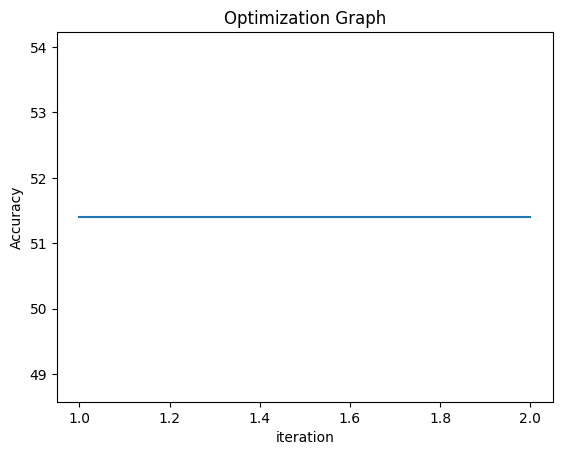

(0.14898868265052412, 51.4018691588785)

In [25]:
data1.train(n_particles=5, n_iter=100)

In [26]:
# data_1 = DataFuzzy('hasil hasil belajar', domain_width=0.05)
data1

Domain Width : 0, Best Fit : (0.14898868265052412, 51.4018691588785)

In [27]:
data1.domain_width = data1.gbest[0]
data1

Domain Width : 0.14898868265052412, Best Fit : (0.14898868265052412, 51.4018691588785)

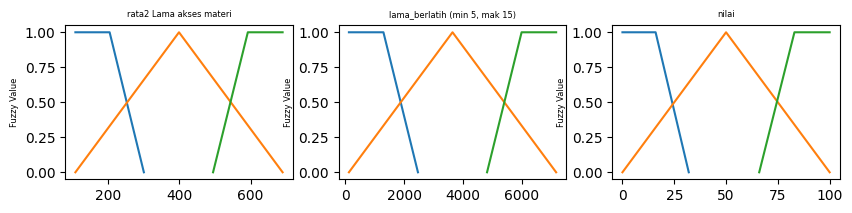

In [28]:
# data_1.optimation(np.arange(0.01,0.5,0.01))
data1.showFigure()

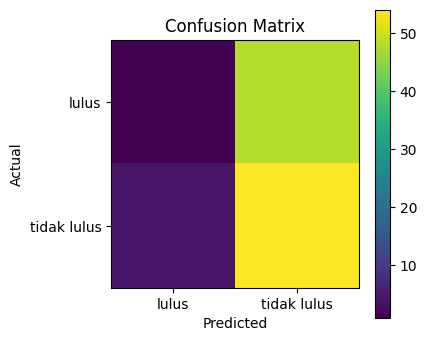

Accuracy : 51.40%


51.4018691588785

In [29]:
data1.showAccuracy(output=True)

Predicting:   0%|          | 0/99 [00:00<?, ?it/s]C:\Users\Windows\AppData\Local\Temp\ipykernel_59244\407157520.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data == [rule[0], rule[1], rule[2]]):
Predicting: 100%|██████████| 99/99 [00:30<00:00,  3.23it/s]

x : [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(7

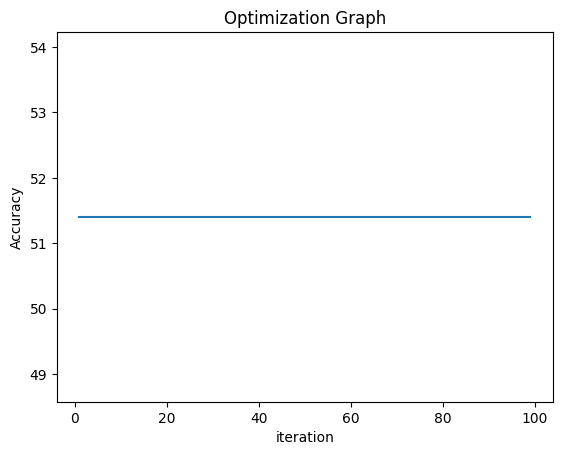

Best Fit : (np.int64(1), 51.4018691588785)


In [30]:
#Without PSO
data1.optimation(np.arange(1,100,1))

In [31]:
# data_1.AllMin
data_1.domain_width = 0.31
data_1.Inference()

NameError: name 'data_1' is not defined

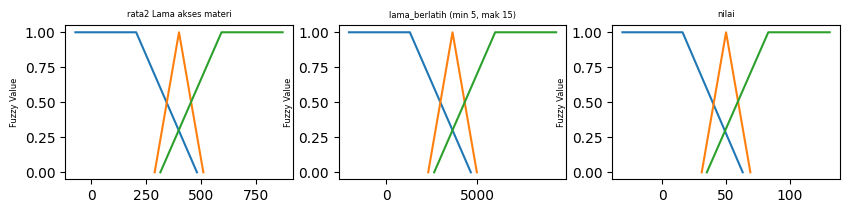

In [ ]:
data_1.showFigure()

In [ ]:
data_1.domain_width = 0.01
data_1.Inference()

C:\Users\pande\AppData\Local\Temp\ipykernel_6300\216905476.py:262: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data == [rule[0], rule[1], rule[2]]):


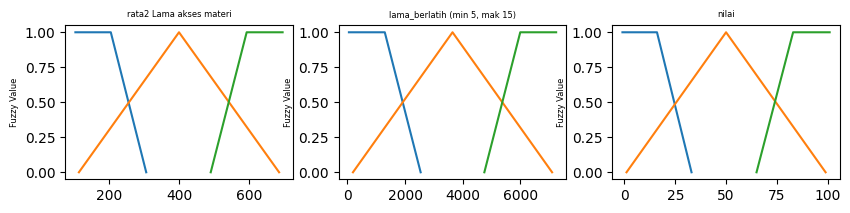

In [ ]:
data_1.showFigure()

In [ ]:
data_1.data_fuzzy

{'rata2 Lama akses materi': [(104, 306), (114, 685), (490, 695)],
 'lama_berlatih (min 5, mak 15)': [(51, 2539), (191, 7099), (4749, 7239)],
 'nilai': [(-1, 33), (1, 99), (65, 101)]}

In [ ]:
max = 690
min = 109
domain_width = 0.5
amount = 3

print(data_1.make_domain(min,max,amount,domain_width))


[(-181, 591), (399, 400), (205, 980)]


In [ ]:
data_2 = DataFuzzy('hasil hasil belajar', domain_width=0.7)

C:\Users\pande\AppData\Local\Temp\ipykernel_6300\216905476.py:262: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(data == [rule[0], rule[1], rule[2]]):


In [ ]:
data_2.data_fuzzy 

{'rata2 Lama akses materi': [(-297, 707), (515, 284), (89, 1096)],
 'lama_berlatih (min 5, mak 15)': [(-4812, 7402), (5054, 2236), (-114, 12102)],
 'nilai': [(-70, 102), (70, 30), (-4, 170)]}

In [ ]:
data_1.df.head()

,no,rata2 Lama akses materi,"lama_berlatih (min 5, mak 15)",nilai,kesimpulannya,keyakinan
0,7,590,452,75,0,35
1,12,521,790,77,0,22
2,1,532,1306,77,0,20
3,27,415,1679,77,0,22
4,76,596,1072,77,0,20


In [ ]:
data_1.data_fuzzy

{'rata2 Lama akses materi': [(104, 306), (114, 685), (490, 695)],
 'lama_berlatih (min 5, mak 15)': [(51, 2539), (191, 7099), (4749, 7239)],
 'nilai': [(-1, 33), (1, 99), (65, 101)]}

In [ ]:
print(data_1.AllMax.get('lama_berlatih (min 5, mak 15)'))

7169


In [ ]:
print(data_1.AllMin.get('lama_berlatih (min 5, mak 15)'))

121


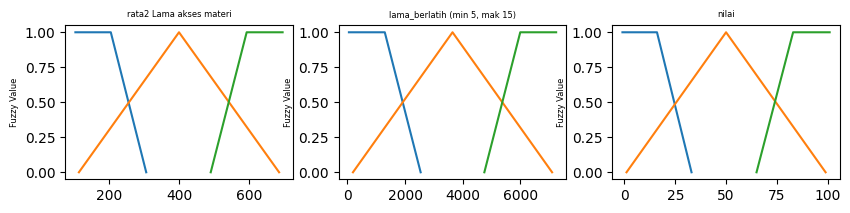

In [ ]:
data_1.showFigure()

In [ ]:
data_1.showAccuracy()

57.943925233644855

In [ ]:
# data_1.optimation([0.1, 0.2, 0.3, 0.4, 0.5])

In [ ]:
data_1

{'no': np.int64(119), 'rata2 Lama akses materi': np.int64(690), 'lama_berlatih (min 5, mak 15)': np.int64(7169), 'nilai': np.int64(100), 'kesimpulannya': np.int64(0), 'keyakinan': np.int64(100)}, {'no': np.int64(1), 'rata2 Lama akses materi': np.int64(109), 'lama_berlatih (min 5, mak 15)': np.int64(121), 'nilai': np.int64(0), 'kesimpulannya': np.int64(0), 'keyakinan': np.int64(0)}, {'rata2 Lama akses materi': [(104, 306), (114, 685), (490, 695)], 'lama_berlatih (min 5, mak 15)': [(51, 2539), (191, 7099), (4749, 7239)], 'nilai': [(-1, 33), (1, 99), (65, 101)]}

In [ ]:
#defuzzy
def cekrang(dataRange, value) -> list[int]:
    ans = []
    for idx, (min,max) in enumerate(dataRange):
        if (idx == 0) and (value <= min):
            ans.append(idx)
        elif (idx == len(dataRange)-1) and (value >= max):
            ans.append(idx)
        elif value >= min and value <= max:
            ans.append(idx)
    return ans


kepercayaan = data1.rules['kepercayaan'].tolist()
range = [(0,50), (25,80 ), (75,100)]
all_value = {
    0:0,
    1:0,
    2:0
}
for i,value in enumerate(kepercayaan):
    cek = cekrang(range,value)
    for idx in cek:
        all_value[idx] += 1
    
print(all_value)

{0: 0, 1: 8, 2: 26}
